코드설명은   
readme의 노션 링크에서 확인해주세요!

가져온 뉴스의 해드라인은 20개 입니다
1 기사 제목: 이재명 "檢 수사, 나 사는 한 계속"…측근과는 말없이 포옹
링크: https://v.daum.net/v/20231006125623854
2 기사 제목: 이재명 “檢, 내가 살아 있는한 계속 수사”…법정서 혐의 부인
링크: https://v.daum.net/v/20231006120006755
3 기사 제목: [단독] 제2의 핼러윈 참사 막는다…이태원에 합동상황실 설치, 안전요원 투입
링크: https://v.daum.net/v/20231006124128615
4 기사 제목: 한국은행의 경고 “지구 온도 올라가면 우리나라 경제 타격”
링크: https://v.daum.net/v/20231006124238648
5 기사 제목: 이재명 "내가 살아 있는 한 계속 수사… 정진상 한 번 안게 해달라"
링크: https://v.daum.net/v/20231006120427965
6 기사 제목: "구영배 대표 믿었는데 장사 접어야 할 판" 큐텐, 소상공인 셀러 정산금 지연 논란
링크: https://v.daum.net/v/20231006124257656
7 기사 제목: "아태지역, 도시화·기후변화로 주거악화…적정가격 주택 필요"
링크: https://v.daum.net/v/20231006122637367
8 기사 제목: 무주택 청년 위한 전세 대출 악용…32억 편취한 일당 실형
링크: https://v.daum.net/v/20231006101247268
9 기사 제목: 국민 60% "북한, 남한이 틈 보이면 언제든 공격할 것" 예상
링크: https://v.daum.net/v/20231006122421351
10 기사 제목: 야 "김행 자격미달 사퇴해야" 여 "권인숙 여가위원장 사퇴해야"(종합)
링크: https://v.daum.net/v/20231006123158438
11 기사 제목: "러, 북에 핵잠수함 기술 이전 원치 않아…시찰도 거절했을 듯"
링크: https://v.daum.net/v/202310061232

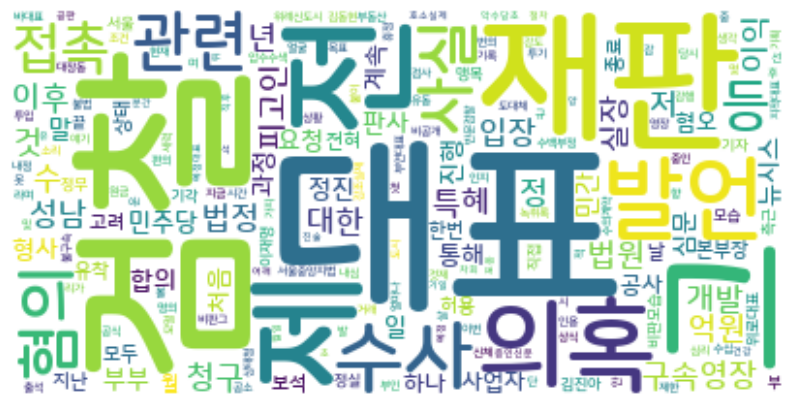

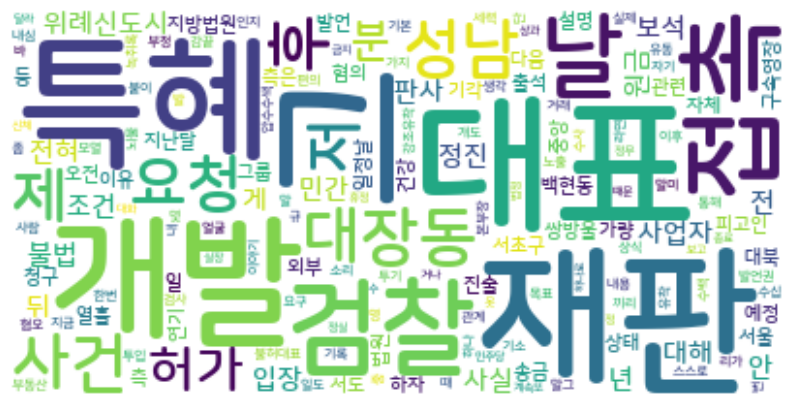

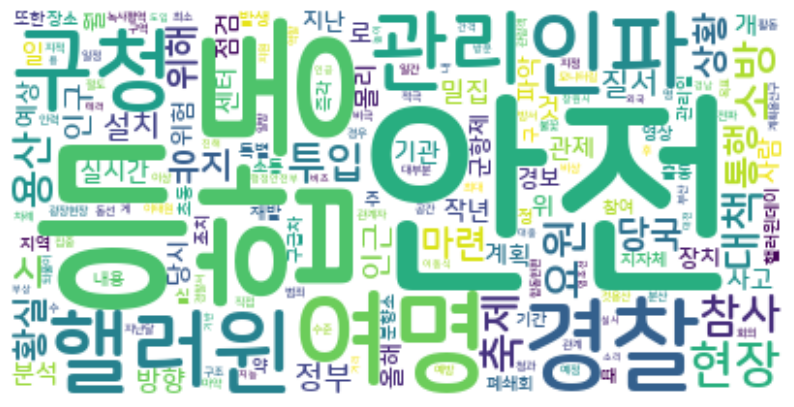

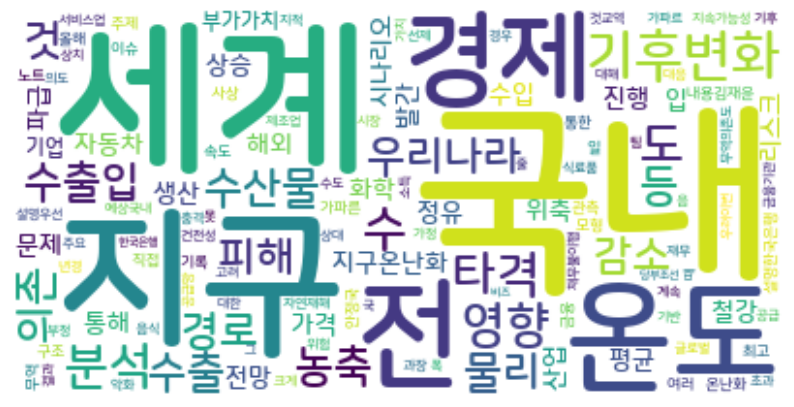

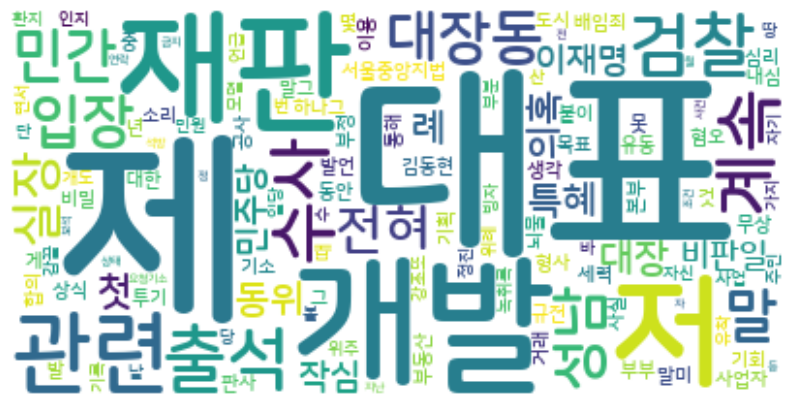

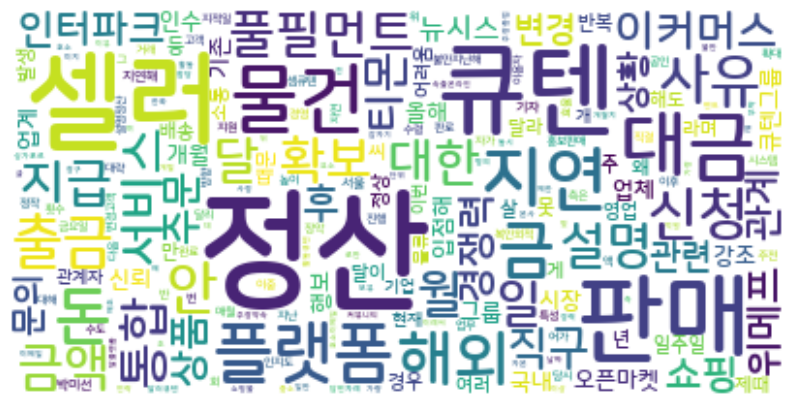

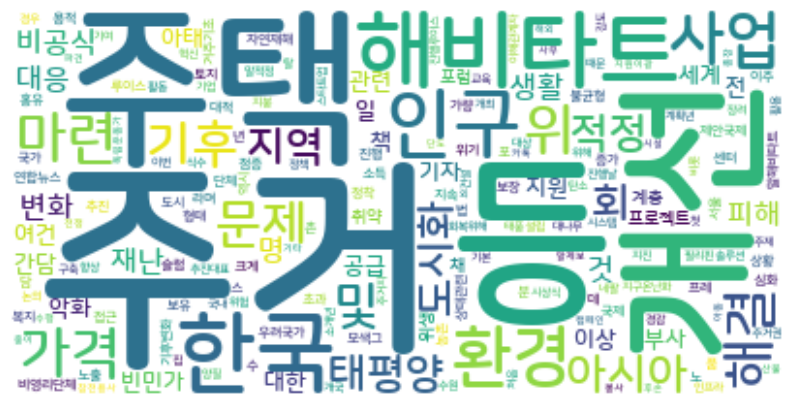

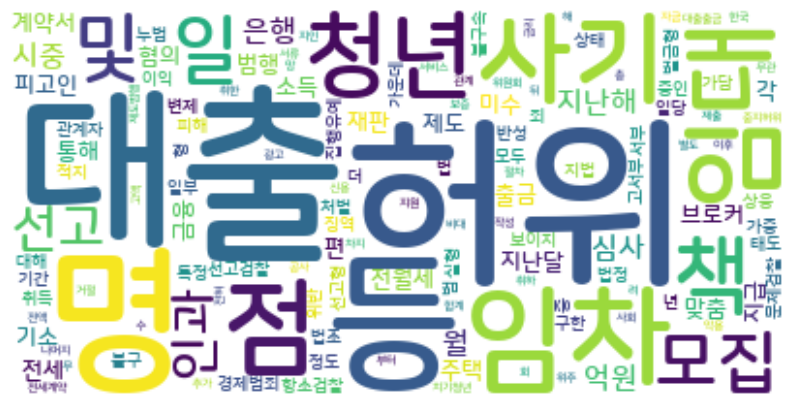

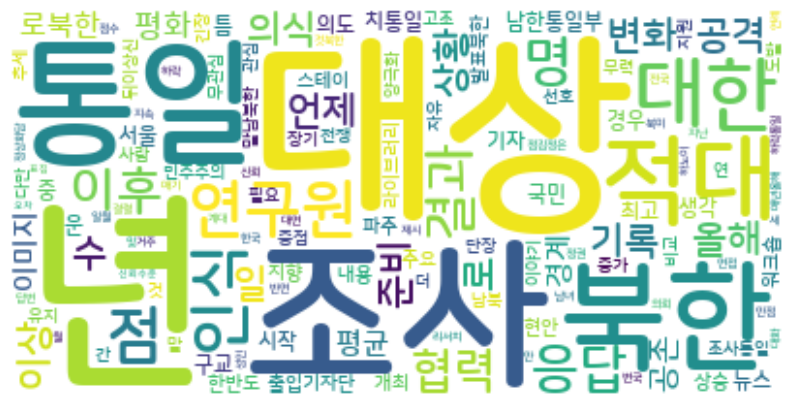

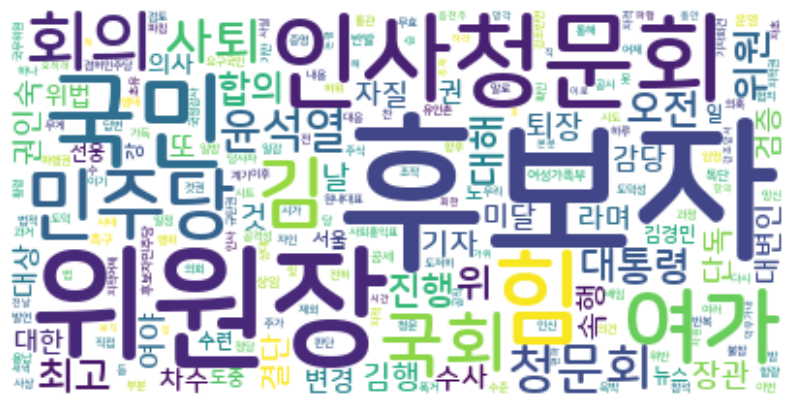

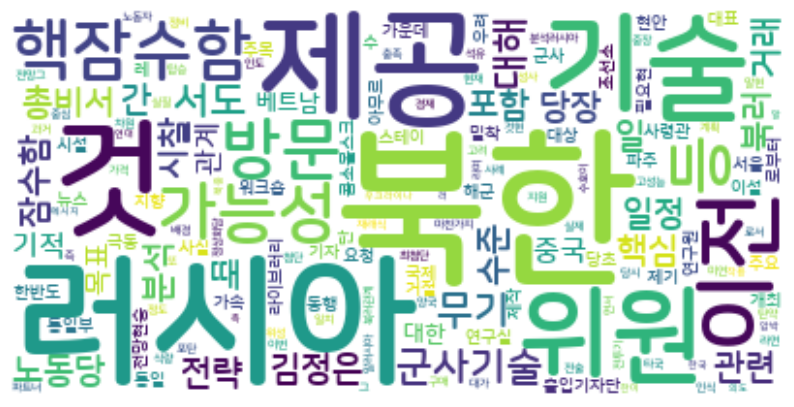

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [12]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


url = "https://news.daum.net/"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"}

html = requests.get(url, headers=headers)
soup = BeautifulSoup(html.content, 'html.parser')
news_block = soup.find(class_="box_g box_news_issue")
news_main = news_block.find_all(class_="tit_g")

news_block_len = len(news_main)

news_content_link = []
news_content_headline = []

for i in range(news_block_len):
    link_element = news_main[i].find('a', class_='link_txt')
    if link_element and 'href' in link_element.attrs:
        news_content_link.append(link_element['href'])
    else:
        news_content_link.append("N/A")  
        
    # 기사 제목을 추출합니다.
    headline_element = news_main[i].find('a')
    if headline_element:
        news_content_headline.append(headline_element.text)
    else:
        news_content_headline.append("N/A")
        # 기사 제목을 찾을 수 없는 경우 처리

cleaned_data = []
for item in news_content_headline:
    # 공백 제거 및 제목 부분 추출
    cleaned_item = re.sub(r'\n\s*', '', item.strip())
    cleaned_data.append(cleaned_item)

# 가져온 내용 출력
print(f'가져온 뉴스의 해드라인은 {news_block_len}개 입니다')
for i in range(news_block_len):
    print(f"{i+1} 기사 제목: {cleaned_data[i]}")
    print(f"링크: {news_content_link[i]}")





for selected_news_link in news_content_link:망
    # 선택한 뉴스 링크의 내용을 가져옵니다
    html = requests.get(selected_news_link, headers=headers)
    soup = BeautifulSoup(html.content, 'html.parser')

    # 뉴스 기사의 텍스트 내용을 추출하고 처리합니다
    news_text = ""
    for p in soup.find_all('p', {'dmcf-ptype': 'general'}):
        extracted_text = p.get_text()

        # 특수 문자와 숫자를 제거하는 정규 표현식
        text_data = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", extracted_text)

        # 형태소 분석하고 불용어를 제거합니다
        okt = Okt()
        tokens = okt.nouns(text_data)
        stopwords = ["을", "를", "이", "가", "은", "는", "의"]
        filtered_tokens = [word for word in tokens if word not in stopwords]

        # 필터링된 토큰을 합쳐서 뉴스 텍스트를 생성합니다
        news_text += " ".join(filtered_tokens)

    # 뉴스 텍스트에서 워드 클라우드를 생성합니다
    word_counts = Counter(news_text.split())
    wordcloud = WordCloud(font_path="NanumSquareRoundB.ttf", background_color='white').generate_from_frequencies(word_counts)

    # 워드 클라우드를 화면에 표시합니다
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
